<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_1/ds_mod1_lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mind the path for the csv file in your gdrive
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/A160324189_28_143_208.csv" .
pd.options.display.float_format = "{:,.2f}".format

dados = pd.read_csv("/content/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Olhar ultimo mês do ordenado por total
* Slicing
* Ultimo mês pode ser incompleto, talvez seja melhor usar o penultimo
* Dados são por data de atendimento, não de processamento
* Ultimos meses tem uma queda natural em relação ao processamento tardio de  internações - Represamento de dados.
* Encontrar um grafico que represente bem


In [8]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
# usaveis = usaveis.drop("Total", axis=1)
# usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6

In [17]:
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

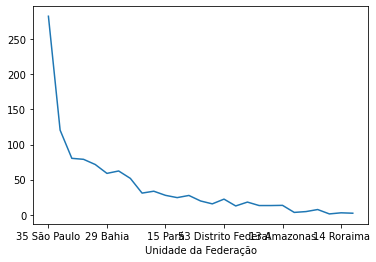

In [18]:
gastos_do_mais_recente.plot()

Plot padrão inviável.

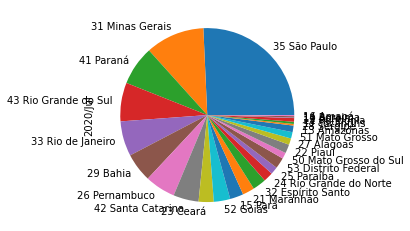

In [19]:
gastos_do_mais_recente.plot(kind='pie')

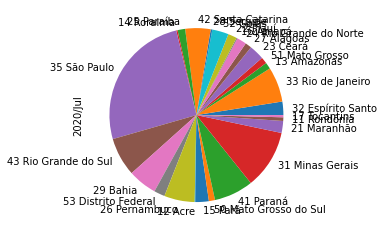

In [20]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

Pie plot horrivel.
- Legenda muito pequena
- Número de fatias inacreditavel
- Se não estiver ordenado, complicado de tirar conclusões não obvias

In [23]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

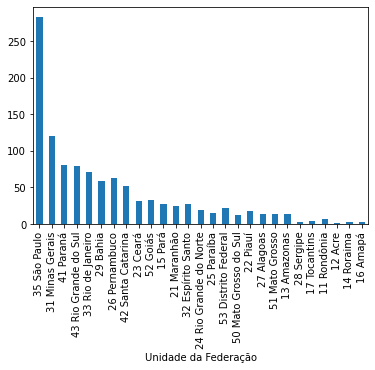

In [27]:
gastos_do_mais_recente.plot(kind='bar')

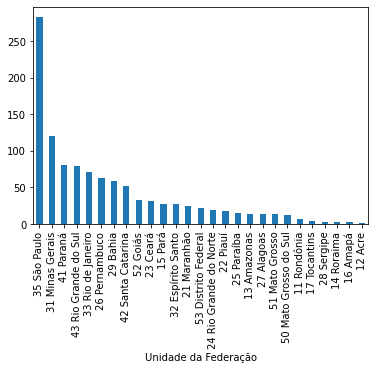

In [30]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

# Desafios

Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

## Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

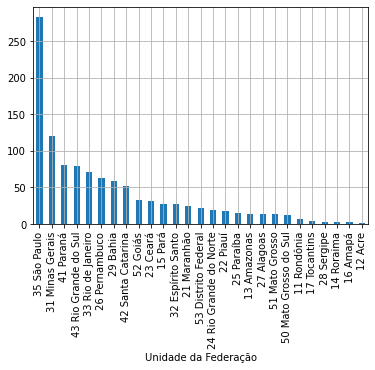

In [32]:
gastos_do_mais_recente.plot(kind='bar', grid=True)
plt.show()

## Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

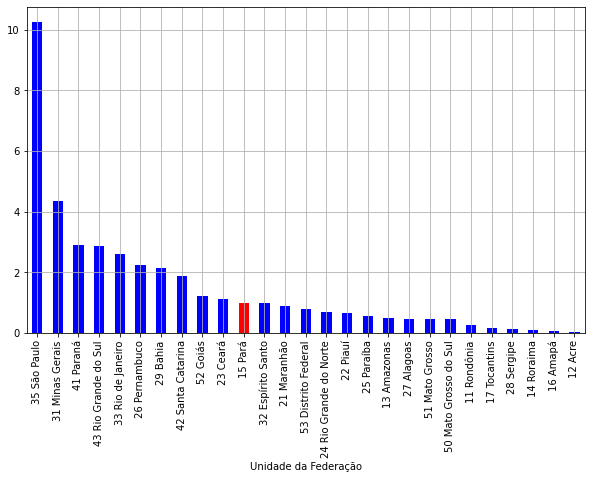

In [118]:
label_estado_ref_02 = "15 Pará"
desafio_02 = gastos_do_mais_recente / gastos_do_mais_recente.loc[label_estado_ref_02]
estado_ref = gastos_do_mais_recente.index.get_loc(label_estado_ref_02)
label_colors_02 = ['b']*27
label_colors_02[estado_ref] = 'r'
desafio_02.plot(kind='bar', grid=True, color=label_colors_02, figsize=(10,6))

## Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [92]:
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/pop_por_estado_jul_2020.csv" .
pop_dados = pd.read_csv("/content/pop_por_estado_jul_2020.csv")
desafio_03_gastos_do_mais_recente = gastos_do_mais_recente.copy()
novos_indices = [" ".join(idx.split()[1:]) for idx in desafio_03_gastos_do_mais_recente.index]
desafio_03_gastos_do_mais_recente.index = novos_indices
pop_dados = pop_dados.set_index("Unidade federativa")
pop_dados["Gastos (mi)"] = desafio_03_gastos_do_mais_recente
pop_dados["Gastos per capta"] = pop_dados["Gastos (mi)"]*10**6 / pop_dados["População"]
pop_dados.head()

,População,Gastos (mi),Gastos per capta
Unidade federativa,,,
São Paulo,46289333,282.71,6.11
Minas Gerais,21292666,120.47,5.66
Rio de Janeiro,17366189,71.54,4.12
Bahia,14930634,58.90,3.94
Paraná,11516840,80.32,6.97


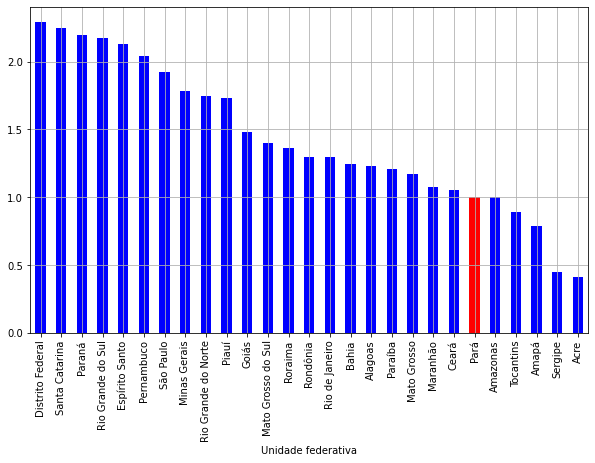

In [131]:
label_estado_ref_03 = "Pará"
desafio_03 = pop_dados["Gastos per capta"] / pop_dados["Gastos per capta"][label_estado_ref_03]
desafio_03 = desafio_03.sort_values(ascending=False)
estado_ref = desafio_03.index.get_loc(label_estado_ref_03)
label_colors_03 = ['b']*27
label_colors_03[estado_ref] = 'r'
ax = desafio_03.plot(kind='bar', grid=True, color=label_colors_03, figsize=(10,6))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))

## Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

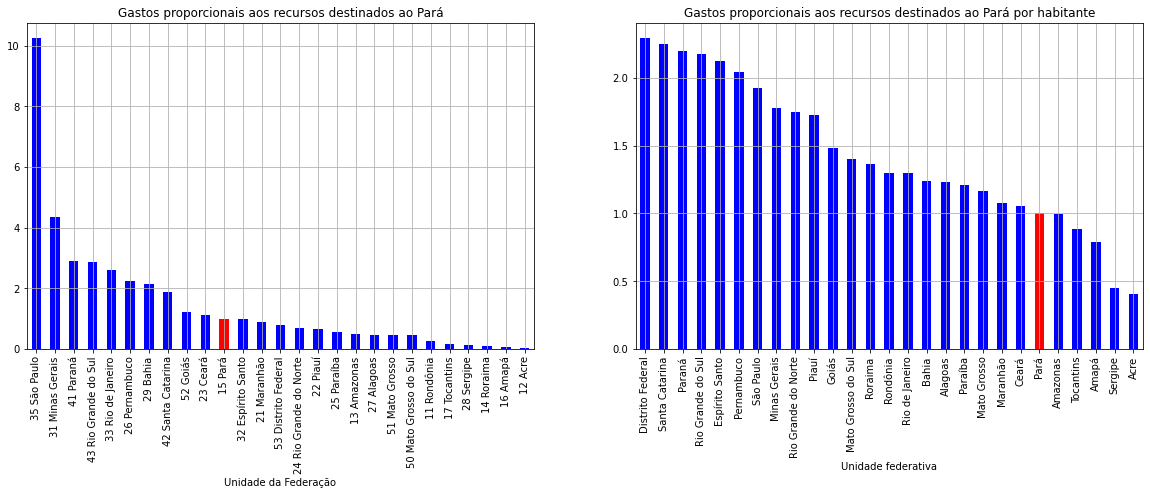

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
desafio_02.plot(kind='bar', grid=True, color=label_colors_02, ax=axes[0],
                title="Gastos proporcionais aos recursos destinados ao Pará")
desafio_03.plot(kind='bar', grid=True, color=label_colors_03, ax=axes[1],
                title="Gastos proporcionais aos recursos destinados ao Pará por habitante")

Embora o estado do Pará seja o 10<sup>o</sup> estado em valores absolutos de recursos, que o destaca muito dos outros estados da região norte. Proporcionalmente à sua população, é o 21<sup>o</sup> em valores per capita.
Essa diferença de posição se dá pela sua quantidade de habitantes, que é elevada em comparação com os demais estados da região norte.